In [3]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal

In [4]:
path2root = "../../"
sbj_num = 12
subjects_fol = "subjects/"
sampling_test_fol = "sampling-test/"

In [5]:
sampling_test_dir = path2root + subjects_fol + f"{sbj_num}/" + sampling_test_fol

with open(sampling_test_dir + "t.pickle", 'rb') as f:
    t = pickle.load(f)
with open(sampling_test_dir + "y-hat-boi.pickle", 'rb') as f:
    boi = pickle.load(f)
with open(sampling_test_dir + "y-hat-et.pickle", 'rb') as f:
    et = pickle.load(f)
    
n_smp = et.shape[0]

In [6]:
x = et[:, 0]
y = et[:, 1]

In [47]:
x_med = signal.medfilt(x, 5)
y_med = signal.medfilt(y, 5)

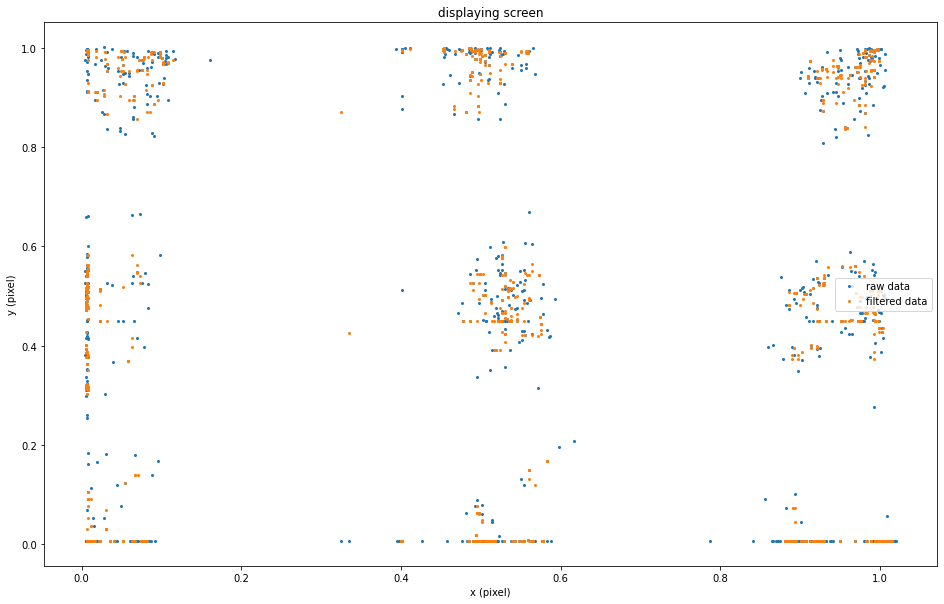

In [50]:
fig = plt.figure(figsize=(16, 10))
plt.plot(x, y, 'o', markersize=2, label="raw data")
plt.plot(x_med, y_med, 'o', markersize=2, label="filtered data")
plt.xlabel("x (pixel)")
plt.ylabel("y (pixel)")
plt.title("displaying screen")
plt.legend()

Text(0, 0.5, 'x (pixel/screen_width)')

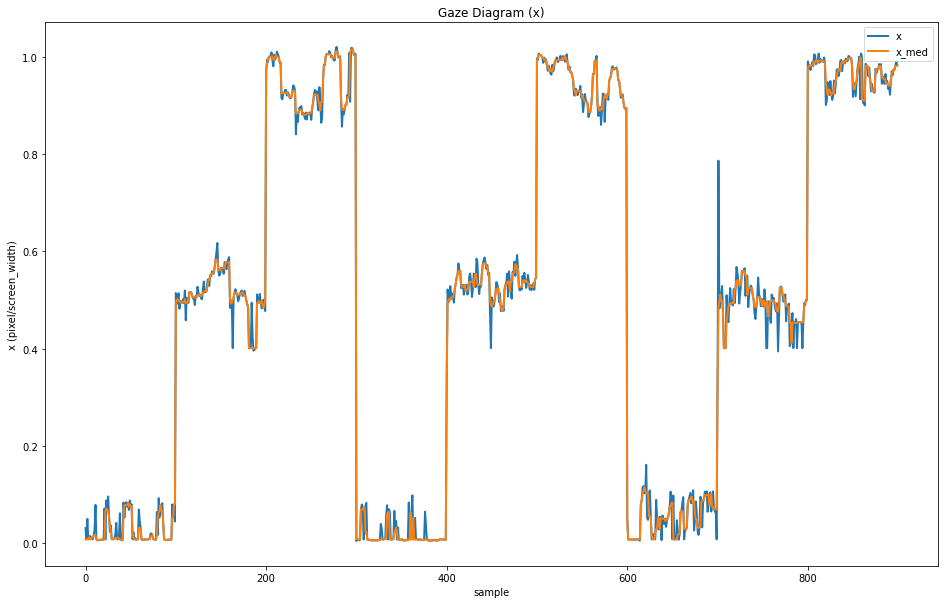

In [35]:
fig = plt.figure(figsize=(16, 10))
plt.plot(x, linewidth=2, label="x")
plt.plot(x_med, linewidth=2, label="x_med")
plt.legend()
plt.title("Gaze Diagram (x)")
plt.xlabel("sample")
plt.ylabel("x (pixel/screen_width)")

Text(0, 0.5, 'y (pixel/screen_width)')

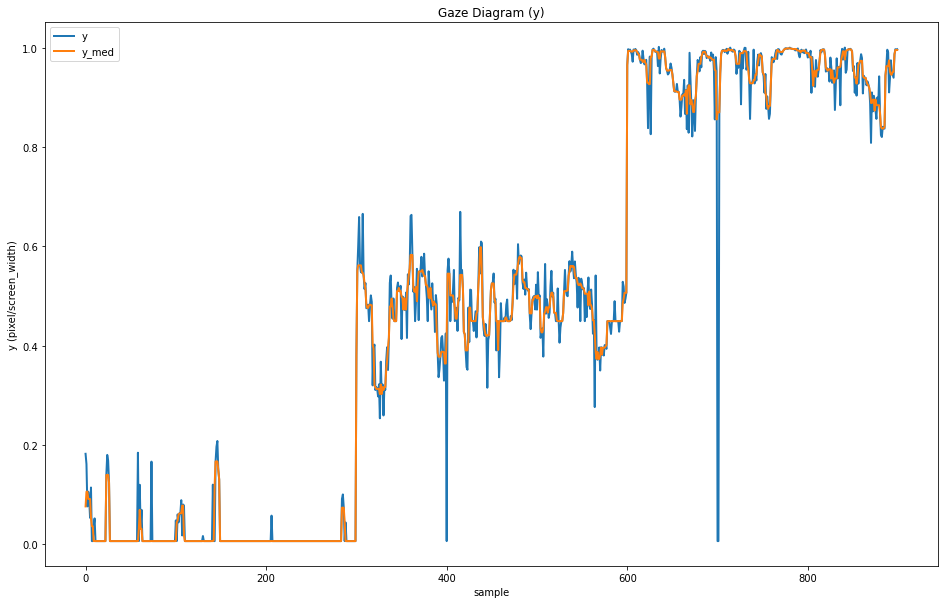

In [51]:
fig = plt.figure(figsize=(16, 10))
plt.plot(y, linewidth=2, label="y")
plt.plot(y_med, linewidth=2, label="y_med")
plt.legend()
plt.title("Gaze Diagram (y)")
plt.xlabel("sample")
plt.ylabel("y (pixel/screen_width)")

In [8]:
vx = x_med.copy()
vy = y_med.copy()
# vx[1:] = (x_med[1:] - x_med[:-1]) / (t[1:] - t[:-1])
# vy[1:] = (y_med[1:] - y_med[:-1]) / (t[1:] - t[:-1])
vx[1:] = (x_med[1:] - x_med[:-1])
vy[1:] = (y_med[1:] - y_med[:-1])
vx[0] = vx[1]
vy[0] = vy[1]

In [9]:
FPS = 15
T = 1/FPS
T_DISCARD = 0.15
X_MERGE = 0.1
Y_MERGE = 0.1
VX_THR = 0.18
VY_THR = 0.18

In [10]:
n_discard = T_DISCARD / T

sac1_x = vx > VX_THR
sac2_x = vx < -VX_THR
sac1_y = vy > VY_THR
sac2_y = vy < -VY_THR
sac_x = sac1_x + sac2_x
sac_y = sac1_y + sac2_y
sac = sac_x + sac_y

sac[0] = True
sac[-1] = True

In [22]:
i = 0
fix = []
while True:
    if i >= n_smp-1:
        break
    if sac[i]:
        j = 0
        while True:
            if sac[i+j+1]:
                break
            else:
                j += 1
        fix.append([i, t[i+1], t[i+j+1]-t[i+1], x_med[i+1:i+j+1].mean(), y_med[i+1:i+j+1].mean()])
        i += j+1
print(fix)

[[0, 17.96, 9.55, 0.025436971, 0.018230017], [100, 27.6, 8.479999999999997, 0.50958425, 0.019294742], [200, 36.16, 8.400000000000006, 0.9462104, 0.008376461], [300, 44.63, 9.149999999999999, 0.013699771, 0.4643016], [400, 53.87, 7.560000000000002, 0.53117454, 0.48545337], [500, 61.52, 8.219999999999992, 0.95204747, 0.47177044], [600, 69.83, 8.799999999999997, 0.052817892, 0.95587766], [700, 78.72, 8.310000000000002, 0.4925657, 0.9738281], [800, 87.11, 6.540000000000006, 0.96537906, 0.9477734]]


In [24]:
nf = []
xf = []
yf = []
for f in fix:
    nf.append(f[0])
    xf.append(f[3])
    yf.append(f[4])

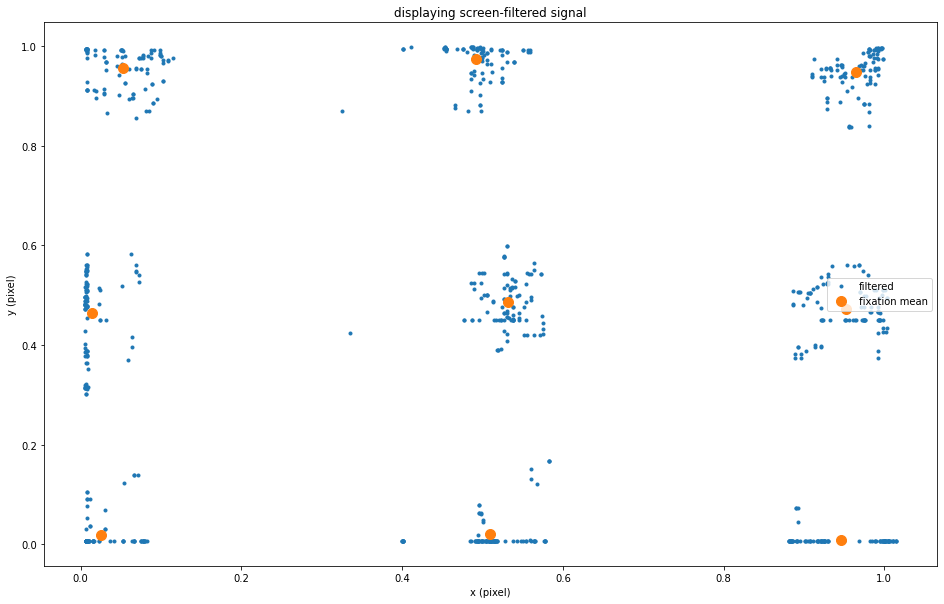

In [53]:
plt.figure(figsize=(16, 10))
plt.plot(x_med, y_med, 'o', markersize=3, label="filtered")
plt.plot(xf, yf, 'o', markersize=10, label="fixation mean")
plt.xlabel("x (pixel)")
plt.ylabel("y (pixel)")
plt.title("displaying screen-filtered signal")
plt.legend()

Text(0, 0.5, 'x (pixel/screen_width)')

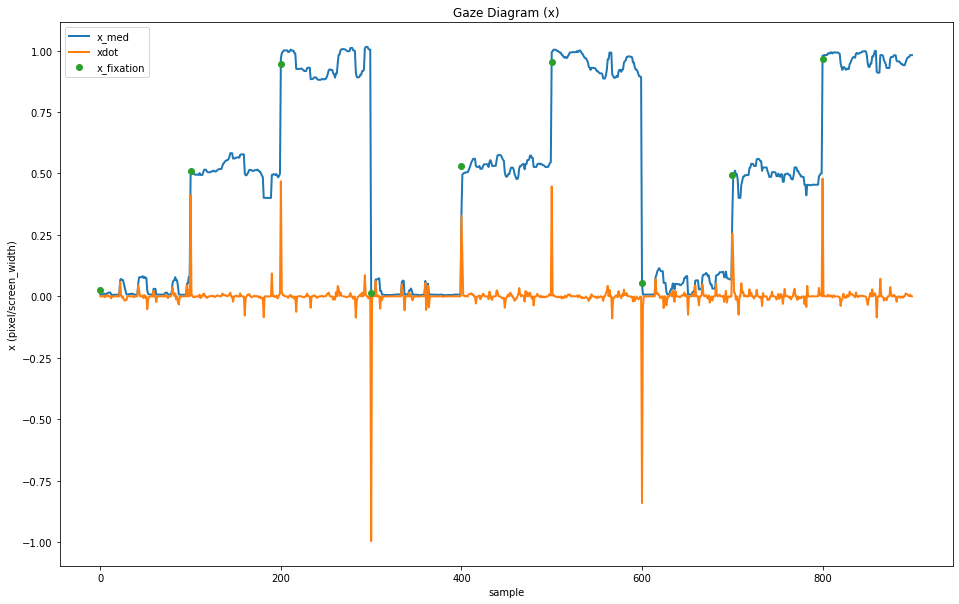

In [54]:
fig = plt.figure(figsize=(16, 10))
plt.plot(x_med, linewidth=2, label="x_med")
plt.plot(vx, linewidth=2, label="xdot")
plt.plot(nf, xf, 'o', label="x_fixation")
plt.legend()
plt.title("Gaze Diagram (x)")
plt.xlabel("sample")
plt.ylabel("x (pixel/screen_width)")

Text(0, 0.5, 'y (pixel/screen_width)')

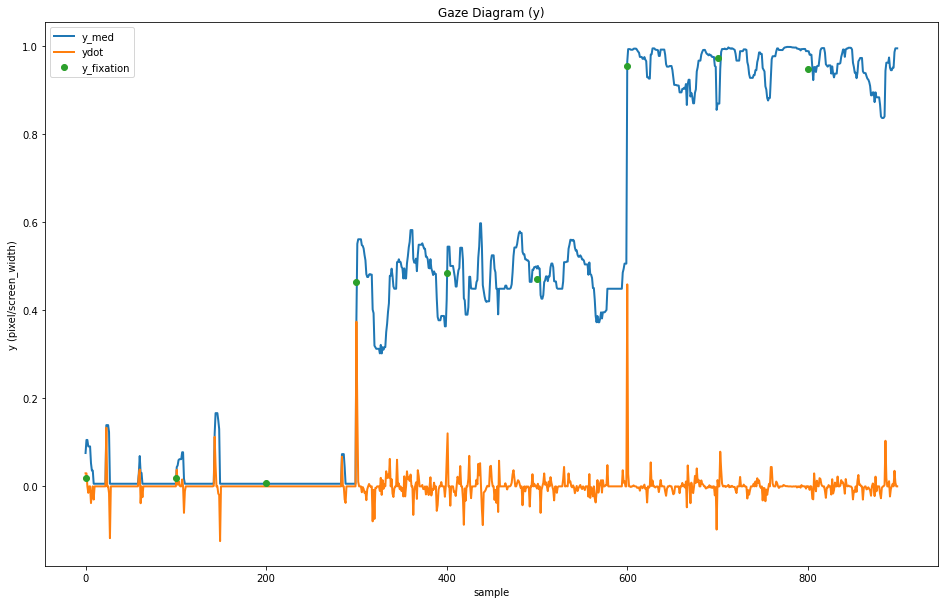

In [56]:
fig = plt.figure(figsize=(16, 10))
plt.plot(y_med, linewidth=2, label="y_med")
plt.plot(vy, linewidth=2, label="ydot")
plt.plot(nf, yf, 'o', label="y_fixation")
plt.legend()
plt.title("Gaze Diagram (y)")
plt.xlabel("sample")
plt.ylabel("y (pixel/screen_width)")

In [95]:
aoi = [[[0, 0], [0.33, 0.33]], [[0.33, 0], [0.66, 0.33]], [[0.66, 0], [1, 0.33]],
      [[0, 0.33], [0.33, 0.66]], [[0.33, 0.33], [0.66, 0.66]], [[0.66, 0.33], [1, 0.66]],
      [[0, 0.66], [0.33, 1]], [[0.33, 0.66], [0.66, 1]], [[0.66, 0.66], [1, 1]]]

In [93]:
# aoi = [[[0, 0], [0.33, 0.33]], [[0.33, 0], [0.66, 0.33]], [[0, 0.33], [0.33, 0.66]],
#       [[0.66, 0], [1, 0.33]], [[0.33, 0.33], [0.66, 0.66]], [[0.66, 0.33], [1, 0.66]],
#       [[0, 0.66], [0.33, 1]], [[0.33, 0.66], [0.66, 1]], [[0.66, 0.66], [1, 1]]]

In [98]:
fix_new = []
for f in fix:
    f1 = f.copy()
    xm = f[3]
    ym = f[4]
    for (i, a) in enumerate(aoi):
        if a[0][0] < xm and a[1][0] > xm and a[0][1] < ym and a[1][1] > ym:
            print(i+1)
            f1.append(i+1)
    fix_new.append(f1)

1
2
3
4
5
6
7
8
9


In [100]:
print(fix_new)

[[0, 17.96, 9.55, 0.025436971, 0.018230017, 0, 1, 1], [100, 27.6, 8.479999999999997, 0.50958425, 0.019294742, 1, 2, 2], [200, 36.16, 8.400000000000006, 0.9462104, 0.008376461, 2, 3, 3], [300, 44.63, 9.149999999999999, 0.013699771, 0.4643016, 0, 0, 0, 3, 4, 4], [400, 53.87, 7.560000000000002, 0.53117454, 0.48545337, 4, 5, 5], [500, 61.52, 8.219999999999992, 0.95204747, 0.47177044, 5, 6, 6], [600, 69.83, 8.799999999999997, 0.052817892, 0.95587766, 0, 3, 0, 3, 0, 3, 6, 7, 7], [700, 78.72, 8.310000000000002, 0.4925657, 0.9738281, 1, 4, 1, 4, 1, 4, 7, 8, 8], [800, 87.11, 6.540000000000006, 0.96537906, 0.9477734, 8, 9, 9]]
